# Handout 1: Instance-based Learning (Problem 3)

### 0.1. Functions Definition

In this initial subsection, we will define the different functions that will be used.

In [9]:
import numpy as np
from numpy import array, dot
from qpsolvers import solve_qp
import matplotlib.pyplot as plt

In [10]:
def plot(X, y, title, xlabel, ylabel):
    #plt.scatter(XP1[:,0],XP1[:,1], c=yP1)
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], color= '#FFFF00', label='class 1')
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], color= '#6A5ACD', label='class 2')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [11]:
def describe(arr):
    # measures of central tendency 
    mean = np.mean(arr) 
    median = np.median(arr) 
  
    # measures of dispersion 
    min = np.amin(arr) 
    max = np.amax(arr) 
    range = np.ptp(arr) 
    varience = np.var(arr) 
    sd = np.std(arr) 
    
    print("Descriptive analysis") 
    print("\n\nMeasures of Central Tendency") 
    print("*****************************")
    print("Mean =", mean) 
    print("Median =", median) 
    print("\n\nMeasures of Dispersion") 
    print("*****************************")
    print("Minimum =", min) 
    print("Maximum =", max) 
    print("Range =", range) 
    print("Varience =", varience) 
    print("Standard Deviation =", sd)

In [12]:
def min_max_scaler(x, min_lim=0, max_lim=1):
    x_min = np.min(x);
    x_max = np.max(x);
    x_std = ( x - x_min ) / ( x_max - x_min );
    return x_std * ( max_lim - min_lim ) + min_lim

In [51]:
def classification_map(X, y, model, xlabel, ylabel, title):
    xx, yy = np.meshgrid(np.linspace(-0.25, 1.25, 200), np.linspace(-0.25, 1.25, 200))
    # evaluate decision function in a grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, -Z, shading="auto")
    plt.scatter(X[np.where(y < 0)[0]][:,0], X[np.where(y < 0)[0]][:,1], color= '#FFFF00', label='class 1')
    plt.scatter(X[np.where(y > 0)[0]][:,0], X[np.where(y > 0)[0]][:,1], color= '#6A5ACD', label='class 2')
    plt.legend()
    plt.colorbar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show(block=False)

In [14]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', 
                  edgecolors='k', label='support vector');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [15]:
def plot_decision_boundaries(X, y, model, title, xlabel, ylabel):
    plt.scatter(X[np.where(y < 0)[0]][:,0], X[np.where(y < 0)[0]][:,1], color= '#FFFF00', label='class 1')
    plt.scatter(X[np.where(y > 0)[0]][:,0], X[np.where(y > 0)[0]][:,1], color= '#6A5ACD', label='class 2')
    plot_svc_decision_function(model)
    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### 0.2. Data Loading and Pre-Processing

The data can be found in two files, the training data in `datasets10/ds1034tr.txt` and the testing data in `datasets10/ds1034te.txt`. This file contains data points pertaining to two different classes.

First, let's load and visualize the data. 

In [16]:
group = '10'
ds = 34
train = np.loadtxt('datasets10/ds'+group+str(ds)+'tr.txt')

In [17]:
test = np.loadtxt('datasets10/ds'+group+str(ds)+'te.txt')

Let's visualize the training data:

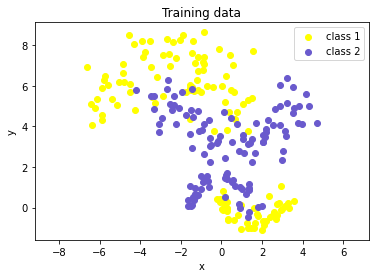

In [18]:
plot(train[:, 0:2], train[:, 2:3], "Training data", "x", "y")

Now, the testing data: 

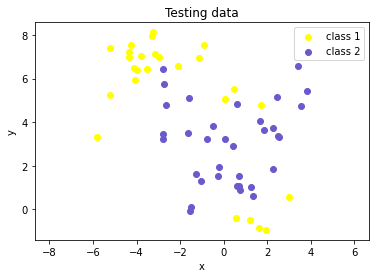

In [19]:
plot(test[:, 0:2], test[:, 2:3], "Testing data", "x", "y")

In [20]:
describe(train)

Descriptive analysis


Measures of Central Tendency
*****************************
Mean = 1.2239488247447876
Median = 1.0


Measures of Dispersion
*****************************
Minimum = -6.639672969793841
Maximum = 8.643243089805098
Range = 15.28291605959894
Varience = 7.323994521303941
Standard Deviation = 2.70628795978993


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler_train = MinMaxScaler()
scaler_train.fit(train)
train_transformed = scaler_train.transform(train)

In [22]:
describe(test)

Descriptive analysis


Measures of Central Tendency
*****************************
Mean = 1.2160691910822872
Median = 1.0


Measures of Dispersion
*****************************
Minimum = -5.814862939782619
Maximum = 8.122273806410707
Range = 13.937136746193325
Varience = 8.497708895533751
Standard Deviation = 2.9150829997675456


In [23]:
describe(train_transformed)

Descriptive analysis


Measures of Central Tendency
*****************************
Mean = 0.5141487370788435
Median = 0.550352717835535


Measures of Dispersion
*****************************
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Varience = 0.12633430277128202
Standard Deviation = 0.355435370737469


The training data will be saved in `X_train` (data points coordinates) and `y_train` (class of the points), and the testing data will be saved in `X_test` and `y_test`.

In [24]:
X_train = train_transformed[:, 0:2]
y_train = train_transformed[:, 2:3]
y_train = np.where(y_train == 0, -1, y_train)

In [25]:
scaler_test = MinMaxScaler()
scaler_test.fit(test)
test_transformed = scaler_test.transform(test)
X_test = test_transformed[:, 0:2]
y_test = test_transformed[:, 2:3]
y_test = np.where(y_test == 0, -1, y_test)

### **Problem 3**. SVM Classifiers - Best parameters and cross validation.

We will use the SVM algorithm to find the separation between the two classes. This algorithm can be found in the `sklearn` library. The requirement of the problem is to find the **best model**, so we will need to create different SVM classifiers with different parameters and determine which one performs better.  

### 1. Defining the parameters

The SVM classifiers can be tweaked and modified by changing the kernel and the `C`.

1. **Kernel:** takes data as input and transform it into the required form. We will use all defined kernels in the `scikit` library. These kernels are:
    * Linear: $\langle x,x'\rangle$
    * Polynomial: $(\gamma \langle x,x'\rangle + r)^d$, where $d$ is specified by parameter `degree`,  $r$ by `coef0`.
    * RBF: $\mbox{exp}(- \gamma \Vert x - x'\Vert^2$), where $\gamma$ is specified by parameter `gamma`, must be greater than 0.
    * Sigmoid: $\mbox{tanh}(\gamma\langle x, x' \rangle + r)$, where $r$ is specified by `coef0`.
2. **C value**: this parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. We will consider the following values for C: **[0.1, 1, 10, 100, 1000]**.

In [26]:
parameters = {'kernel':('linear', 'poly', 'rbf','sigmoid'), 'C':[0.1, 1, 10, 100, 1000]}

### 2. Obtaining the best model

Now, we will use the `GridSearchCV` from the `sklearn.model_selection` library to determine which combination of parameters gives the best model accuracy.

In [27]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train.reshape((y_train.shape[0])))

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [46]:
print(f"The best parameters are: {clf.best_params_}")

The best parameters are: {'C': 10, 'kernel': 'rbf'}


Let's see how the others models have performed. We will create a dataframe that contains all the results obtained by the `GridSearchCV`.

In [47]:
import pandas as pd

columns_df = ['C', 'kernel']
columns_df.extend(sorted(clf.cv_results_.keys()))
columns_df.remove('params')
columns_df.remove('param_C')
columns_df.remove('param_kernel')
columns_df.remove('mean_fit_time')
columns_df.remove('mean_score_time')
columns_df.remove('std_fit_time')
columns_df.remove('std_score_time')
df_ = pd.DataFrame(index = range(0,len(clf.cv_results_['params'])), columns=columns_df)
df_ = df_.fillna(0)
df_
columns_aux = columns_df.copy()
columns_aux.remove('kernel')
for column in columns_aux:
    df_[column] = df_[column].astype(float)
df_['kernel'] = df_['kernel'].astype(object)

In [48]:
total_models = len(clf.cv_results_['params'])
for i in range(0, total_models):
    for column in columns_df:
        if column == 'C':
            results = clf.cv_results_['params'][i]
            value = results['C']
        elif column == 'kernel':
            results = clf.cv_results_['params'][i]
            value = results['kernel']
        else:
            value = clf.cv_results_[column][i]
        df_[column][i] = value

/opt/anaconda3/envs/aa-uib/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [49]:
df_ = df_.sort_values(by=['mean_test_score','std_test_score'], ascending=False)
df_.head()

,C,kernel,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,std_test_score
10,10.0,rbf,0.895833,1.0,0.875000,0.916667,0.875000,0.854167,0.958333,0.037268
14,100.0,rbf,0.895833,1.0,0.875000,0.916667,0.895833,0.854167,0.937500,0.029463
6,1.0,rbf,0.870833,3.0,0.895833,0.895833,0.895833,0.770833,0.895833,0.050000
18,1000.0,rbf,0.870833,3.0,0.833333,0.916667,0.895833,0.791667,0.916667,0.050000
2,0.1,rbf,0.837500,5.0,0.854167,0.875000,0.854167,0.791667,0.812500,0.030619


As previosuly determined, the best model uses `kernel = rbf` and `c = 10`.

### 3. Training the model

Now, we use the parameters obtained before to create our SVM classifier. 

In [33]:
from sklearn.svm import SVC 
model = SVC(kernel=clf.best_params_['kernel'], C=clf.best_params_['C'], random_state=42)
model.fit(X_train, y_train.reshape((y_train.shape[0],)))

SVC(C=10, random_state=42)

Let's plot the decision boundary and the support vectors that the model has computed:

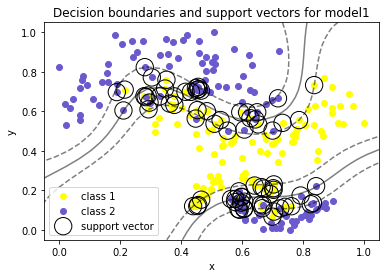

In [50]:
plot_decision_boundaries(X_train,
                         y_train,
                         model,
                         "Decision boundaries and support vectors for model1",
                         "x",
                         "y")

In [35]:
print(f"The model has found {len(model.support_vectors_)} support vectors. ")

The model has found 76 support vectors. 


Next, let's plot the classification map.

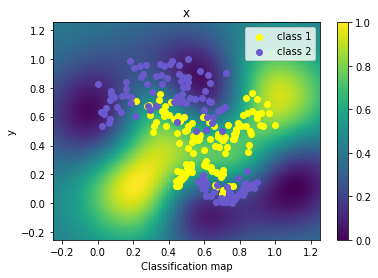

In [36]:
classification_map(X_train, y_train, model, "Classification map", "y", "x")

We can see that the points fall within their respective classes, with few misclassified points.

### 4. Validating the obtained SVM model

Let's validate the model. First, let's use the test data and predict the classes for each one of the points. The validation of the model is done by comparing the predicted classes to the actual classes of the points.

In [52]:
prediction = model.predict(X_test)

Let's see the confusion matrix for this prediction.

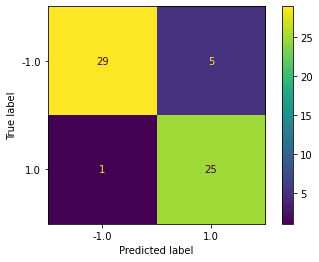

In [53]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  

We can see that the model was able to classify 29/34 points of the first class, and 25/26 of the points of the second class. Even though it has misclassified a few points, it still has a good performance. Let's see just how well this model works and determine the accuracy score, the recall score and the F1 score:

In [54]:
print(f"Model accuracy: {accuracy_score(y_test, prediction)} Model recall score: {recall_score(y_test, prediction, average='macro')} Model F1 score: {f1_score(y_test, prediction, average='macro')}")

Model accuracy: 0.9 Model recall score: 0.9072398190045249 Model F1 score: 0.8995535714285714


Let's plot the classification map with the training points. 

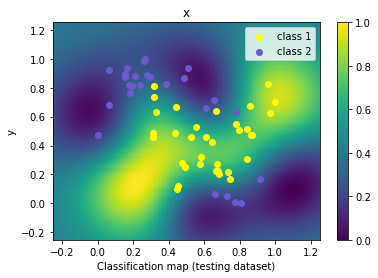

In [40]:
classification_map(X_test, y_test, model, "Classification map (testing dataset)", "y", "x")

Next, we will apply the `cross_validate` function to determine more precisely the accuracy, recall and precision of the model.

In [55]:
X_full = np.concatenate([X_train, X_test])
y_full = np.concatenate([y_train, y_test])

In [56]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro'),
           'acc_macro': make_scorer(accuracy_score)}
scores_cv = cross_validate(model, X_full, y_full.reshape((y_full.shape[0],)), scoring=scoring, cv=5, return_train_score=True)

Let's create a dataframe with the obtained values:

In [57]:
del scores_cv['fit_time']
del scores_cv['score_time']

In [58]:
columns_df_cv = []
columns_df_cv.extend(range(0, len(scores_cv.keys()) - 1))
columns_df_cv.extend(['avg'])
df_cv_scores = pd.DataFrame(index = sorted(scores_cv.keys()), columns=columns_df_cv)
for column in df_cv_scores.keys():
    for metric in scores_cv.keys():
        if column == 'avg':
            df_cv_scores[column][metric] = scores_cv[metric].mean()
        else:
            df_cv_scores[column][metric] = scores_cv[metric][column]

In [45]:
df_cv_scores
df_styler = df_cv_scores.style.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df_styler.set_properties(**{'text-align': 'center'})

,0,1,2,3,4,avg
test_acc_macro,0.866667,0.916667,0.850000,0.883333,0.916667,0.886667
test_prec_macro,0.873303,0.928571,0.850389,0.887205,0.917130,0.891320
test_rec_macro,0.866667,0.916667,0.850000,0.883333,0.916667,0.886667
train_acc_macro,0.904167,0.895833,0.916667,0.895833,0.908333,0.904167
train_prec_macro,0.904419,0.896081,0.916667,0.896081,0.908447,0.904339
train_rec_macro,0.904167,0.895833,0.916667,0.895833,0.908333,0.904167


In [36]:
print(f"Model test accuracy: {df_cv_scores['avg']['test_acc_macro']}\nModel test recall score: {df_cv_scores['avg']['test_rec_macro']}\nModel test precision score: {df_cv_scores['avg']['test_prec_macro']}")

Model test accuracy: 0.8866666666666667
Model test recall score: 0.8866666666666667
Model test precision score: 0.891319889854209
